# <b> Regresión lineal y árboles de decisión para tareas de regresión </b>

---

## Objetivos

Se pretende poner en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es entender de forma práctica con un problema las diferencias que existen a la hora de entrenar los diferentes modelos.

- Realizar un Análisis Exploratorio de Datos (EDA).
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados.

## Descripción del proyecto

El conjunto de datos con el que se va a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005.

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

***

### <b> Análisis descriptivo de los datos </b>

Con este análisis se busca explorar, resumir y visualizar los datos para comprender su estructura, patrones y características principales antes de aplicar cualquier modelo de aprendizaje.


In [323]:
## Carga del dataset
import pandas as pd

dataset = pd.read_csv('air+quality/AirQualityUCI.csv', delimiter=';')

#### <b> ¿Cuántas instancias tiene el dataset? ¿Hay valores nulos? </b>

In [324]:
import numpy as np

n_instancias = dataset.shape[0]
print(f"Sin depurar tiene {n_instancias} instancias.") #Aparecen 9471 instancias
print('_' * 42)

print(dataset.isnull().sum()) #Nulos por columna
print('_' * 42)

Sin depurar tiene 9471 instancias.
__________________________________________
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64
__________________________________________


Se muestra que hay 9471 instancias, lo cuál no coincide con lo indicado en la descripción de la web del dataset.

Hay que hacer un proceso de limpieza de los datos debido a que:
 - Las columnas 15 y 16 no tienen datos.
 - El resto de datos tiene 114 filas nulas.

In [325]:
dataset.dropna(how='all', inplace=True)  # Elimino las filas donde todos sus valores son nulos
dataset.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True) # Elimino las columnas que tienen todos sus valores nulos
n_instancias = dataset.shape[0]

print(dataset.isnull().sum()) #Números de nulos por columna
print('_' * 42)
print(f"Depurado tiene {n_instancias} instancias.") #Aparecen 9357 instancias

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64
__________________________________________
Depurado tiene 9357 instancias.


Decido eliminar las filas donde todos sus valores son nulos. Además elimino las columnas 15 y 16 cuyos valores son todos nulos.
Tras depurar el dataset aparecen <b> 9357 instancias </b> que si coincide con lo indicado en la descripción de la web del dataset.

#### <b> ¿Cuál es el tipo de datos de cada una de las columnas? ¿Cuántas columnas categóricas hay? ¿Cuántas continuas? </b>

In [326]:
dataset.info() #Tipos de datos sin depurar
print('_' * 42)

conv_colum = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
dataset[conv_colum] = dataset[conv_colum].replace(',', '.', regex=True).astype(float)

dataset.info() #Tipos de datos depurados

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.3+ MB
_________

Se observa que las columnas son de tipo object y float, aunque revisando el dataset, las columnas 'CO(GT)', 'C6H6(GT)', 'T', 'RH' y 'AH' no tiene mucho sentido que sean de tipo object y deberían ser de tipo float ya que son resultados númericos, esto se debe a que sus números decimales están separados por comas en lugar de punto, por lo que no se interpretarán correctamente, por ello realizo la transformación.

Cómo se vió con el comando anterior:
- Sin depurar el dataset, hay 7 columnas categóricas (tipo object) y 8 continuas (tipo float).
- Una vez depurado se obtienen 2 columnas categóricas (tipo object) y 13 continuas (tipo float).

#### <b> ¿Existen valores anómalos en el dataset? </b>

In [327]:
null_values = dataset.isnull().sum() #Confirmo que no hay nulos, debido a los cambios hechos anteriormente.
print(null_values)
print('_' * 42)

dataset.replace(-200, np.nan, inplace=True) #Reemplazo los '-200' por NaN
null_values = dataset.isnull().sum()
print(null_values)
print('_' * 42)

num_col = dataset.select_dtypes(include=[np.number]).columns
dataset[num_col] = dataset[num_col].fillna(dataset[num_col].mean()) #Cambio los NaN por la media de esa variable.
null_values = dataset.isnull().sum()
print(null_values)

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64
__________________________________________
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64
__________________________________________
Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(

Confirmo que tras los arreglos que hice anteriormente no hay ningún valor nulo en el dataset, pero según la descripción del mismo en la web hay valores etiquetados como '-200' que indican valores faltantes, los sustituyo por NaN para después sustituirlos por la media de esa variable para tener una ligera aproximación de esos datos.

Aunque se observa que para NMHC, especialmente, faltan la mayoría de valores.

#### <b>¿Cuál es la variable objetivo?</b>

Elijo como variable objetivo **C6H6(GT) (benceno)** de tipo float, debido a que es un indicador significativo de la calidad del aire y a que como se vio en el apartado anterior es la variable que presenta menos valores faltantes y por tanto a priori puede ofrecer una fiabilidad mayor de los datos.

#### <b>¿Cómo es la distribución de las variables CO, NOx y NO2? </b>

            CO(GT)      NOx(GT)      NO2(GT)
count  9357.000000  9357.000000  9357.000000
mean      2.152750   246.896735   113.091251
std       1.316068   193.426632    43.920954
min       0.100000     2.000000     2.000000
25%       1.200000   112.000000    86.000000
50%       2.152750   229.000000   113.091251
75%       2.600000   284.000000   133.000000
max      11.900000  1479.000000   340.000000


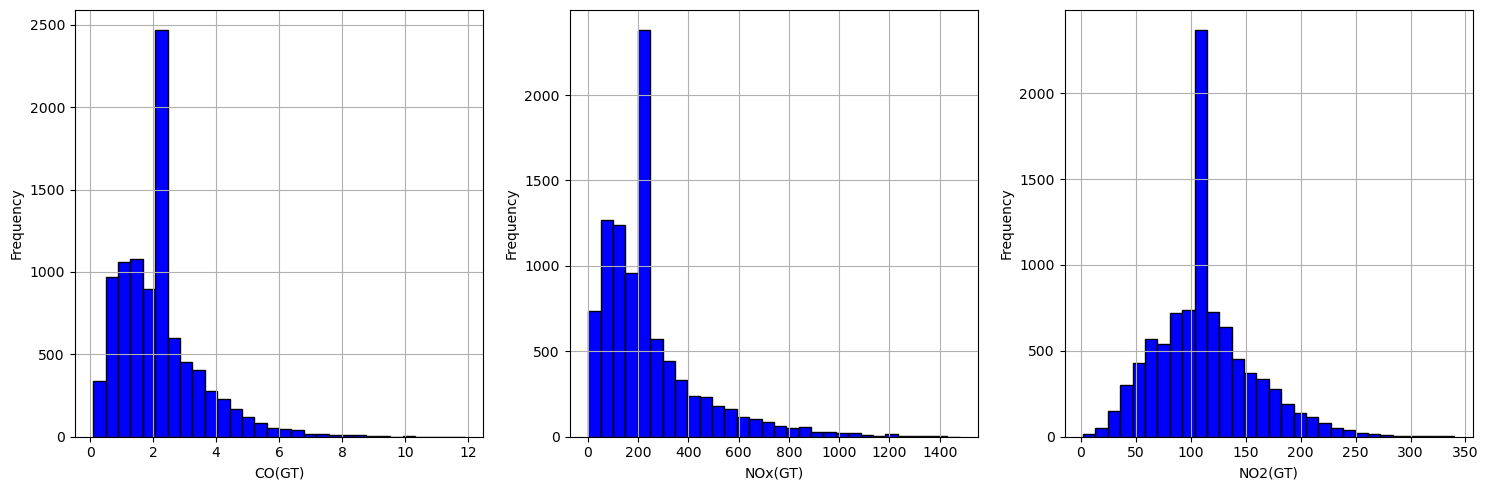

In [328]:
import matplotlib.pyplot as plt
import pandas as pd

print(dataset[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe())

columns_of_interest = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(columns_of_interest):
    axs[i].hist(dataset[col], bins=30, color='blue', edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

En general para estas variables su distribución se encuentra en torno a la media debido a la desviación estándar que presentan, siendo la distribución de NOx la más dispersa y NO2 la más centrada.

Según la mediana y los percentiles la mayoría de los resultados se concentran a la izquierda de la distribución, es decir, las 3 variables presentan una distribución sesgada hacia la izquierda.

Tienen algunos datos faltantes, ya que como vimos anteriormente hay 9357 instancias en total y vimos que faltan 1683, 1639 y 1642 para CO(GT), NOx(GT) y NO2(GT) respectivamente, pero estos datos fueron rellenados por la media como aproximación, por lo que los resultados no son fieles del todo.

Tienen algunos datos atípicos, esto se observa bien en los extremos de los rangos de cada una de las variables y lo alejados que están respecto a su mediana. Destacando especialmente los casos de CO(GT) y NOx(GT) en los que se multiplica por 5 y por 6 su media. Pueden deberse a errores de medición o a momentos puntuales de muy alta contaminación.

#### <b>¿Cómo son las correlaciones entre las variables del dataset? </b>

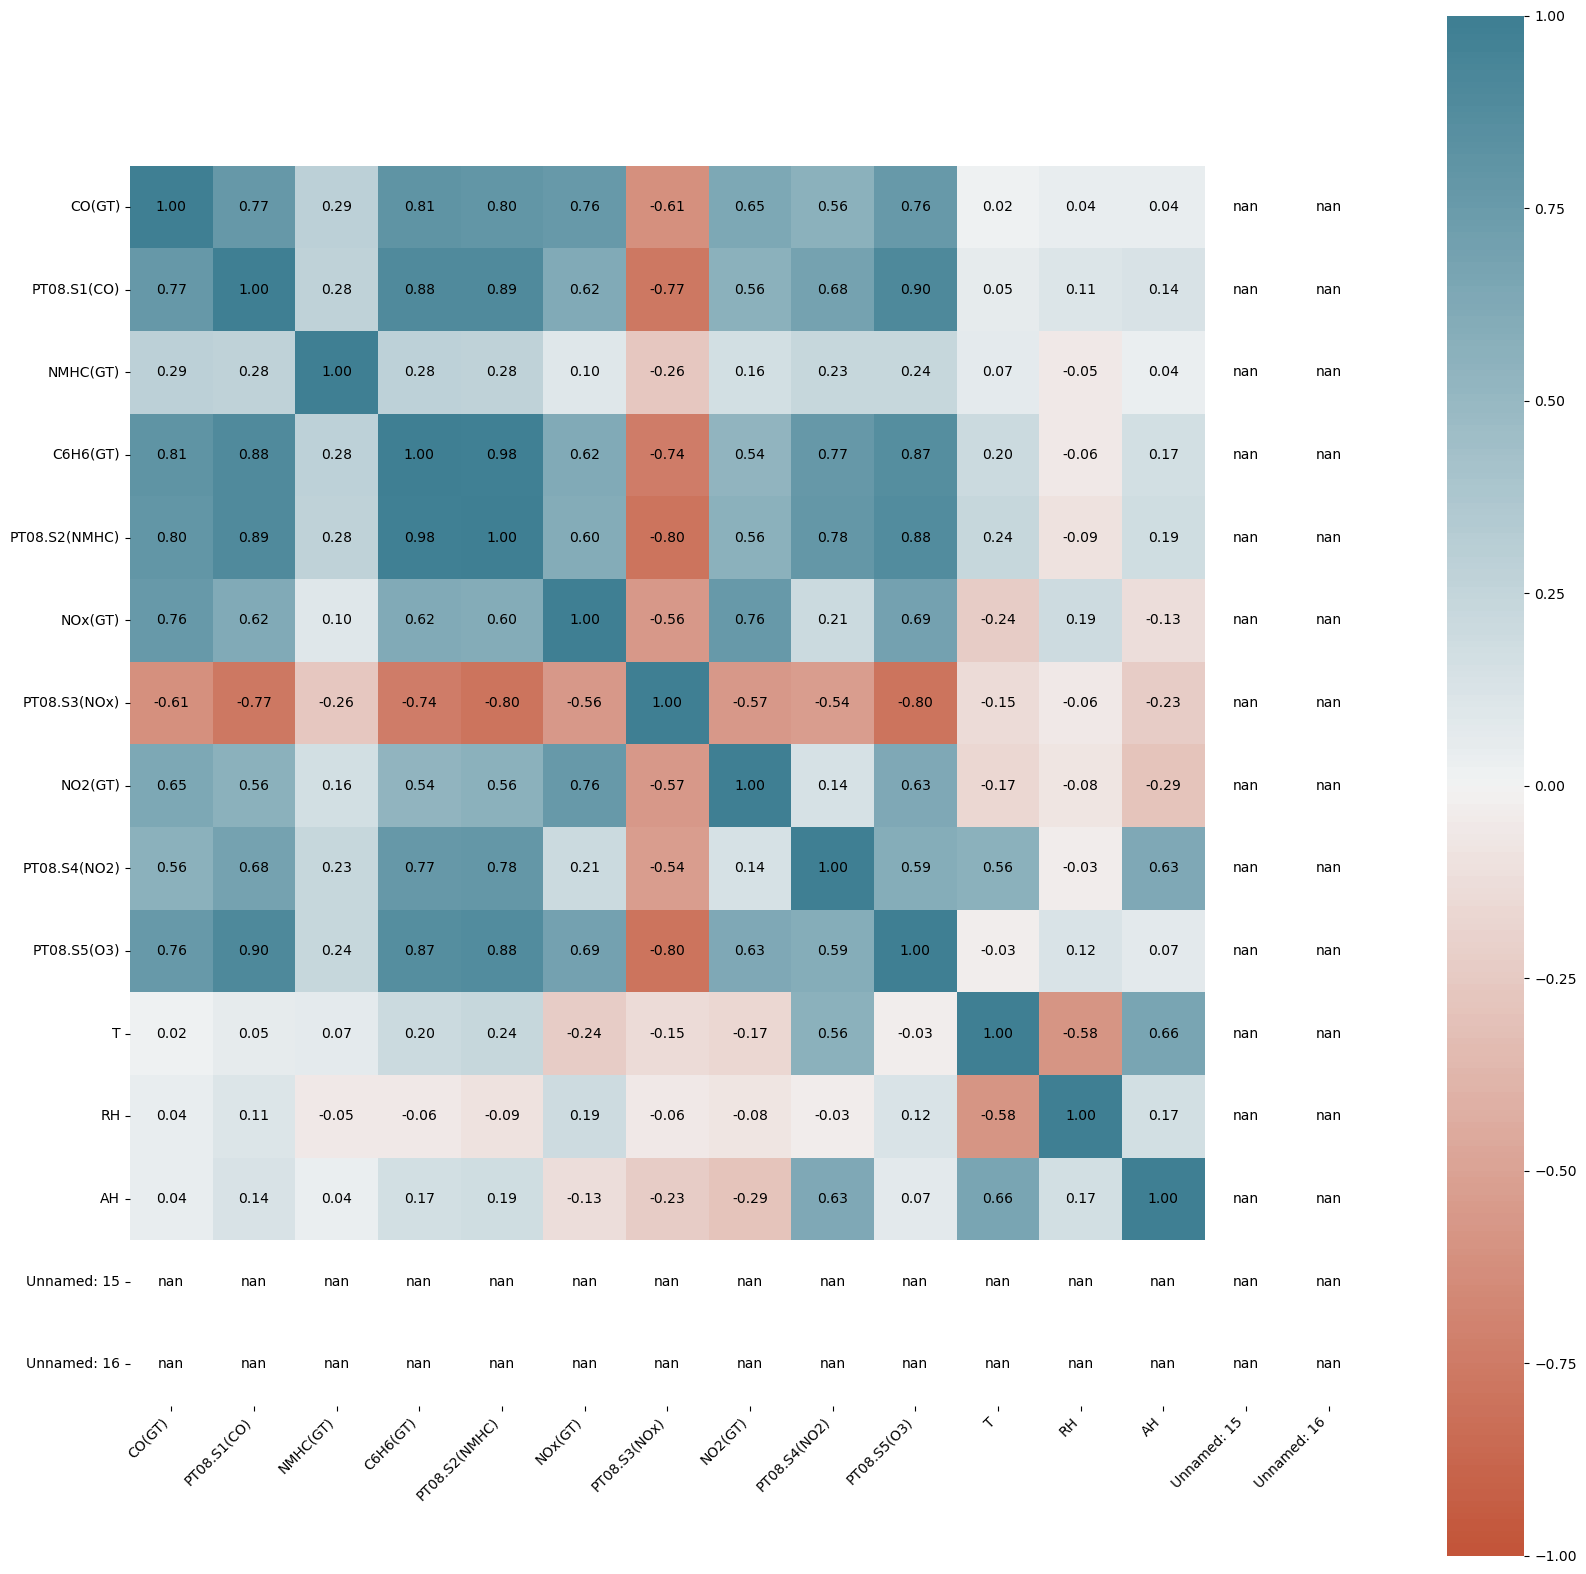

In [329]:
import seaborn as sns

numeric_columns = dataset.select_dtypes(include=[np.number])
corr = numeric_columns.corr()

fig, ax = plt.subplots(figsize=(20, 20))

#Generar mapa de calor
cmap = sns.diverging_palette(20, 220, n=200)
sns.heatmap(corr, ax=ax, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, annot=False, fmt=".2f")

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j+0.5, i+0.5, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="black")

#Etiquetas de los ejes
ax.set_xticklabels(corr.columns, rotation=45, horizontalalignment='right')
ax.set_yticklabels(corr.columns)
plt.show()

Se observan fuertes correlaciones entre los distintos contaminantes y sus respectivos sensores, lo que sugiere que los sensores están cumpliendo su función correctamente, excepto en el caso de NOx, donde su sensor obtiene una correlación negativa con NOx y con todas las demás variables, por lo que probablemente no esté funcionando como debería. 

También se observa como la correlación de NMHC es muy baja en general, seguramente debido a la gran falta de datos que tenía.

#### <b>¿Qué tres variables son las más correlacionadas con la variable objetivo? ¿existe alguna variable que no tenga correlación?</b>

Las 3 variables más correlacionadas con C6H6(GT) son PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC) con 0.87, 0.88, 0.98 respectivamente.

La alta correlación con PT08.S2(NMHC) se debe principalmente a que el benceno es un hidrocarburo por lo que tiene lógica.

Por otro lado, la alta correlación entre CO y C6H6 pueden deberse a su origen, ya que ambos se generan por el tráfico de vehículos (recordemos que en la descripción del dataset se indica que los sensores estaban situados en una zona contaminada de una ciudad italiana).

Se observa que tanto la temperatura (T) como la humedad relativa (RH) y la humedad absoluta (AH) tienen muy baja correlación en general llegando en ocasiones a ser negativa.
<br> Esto indica que estas 3 variables no aportan demasiado a la concentración de gases contaminantes.

#### <b> ¿Qué suposiciones se pueden hacer sobre los datos? ¿qué conclusiones se pueden sacar de cara implementar el modelo predictivo?</b>

 - Los sensores están funcionando correctamente dada su correlación con las variables a medir, excepto para el caso del sensor de NOx que debería ser revisado.
 - La emisión de los gases parece tener una fuente común que es el tráfico, debido a la alta correlación de C6H6(GT) y CO(GT), gases típicos producidos por vehículos.
 - Hay un considerable número de valores faltantes en los gases a medir, especialmente en NMHC(GT), esto puede deberse a errores en la recopilación de los datos.
___
 - Las variables que mostraron altas correlaciones con C6H6, como PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC), tienen que ser incluidas como características principales del modelo. Las variables con baja correlación como (T), (RH) y (AH) pueden ser obviadas ya que no aportan demasiado valor.
 - Un modelo de predicción lineal puede ser una buena aproximación por la aparente relación entre C6H6 y PT08.S2(NMHC) especialmente.

***

### <b> Regresión </b>

Se pretender hacer una comparativa de varios modelos. Unos usarán el algoritmo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos se usará el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algoritmo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se va a probar es una regresión lineal simple.

### Regresión Lineal Simple

Este modelo de caracteriza por involucrar una sola variable independiente (X) como variable predictora del modelo. Se trata de un modelo sencillo y fácil de interpretar.

#### Separación de datos y escalado

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dataset[['PT08.S2(NMHC)']] # Escojo PT08.S2(NMHC) como variable predictora, ya que tenía una gran correlación con C6H6 de 0.98
y = dataset['C6H6(GT)']        # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Creación y entrenamiento del modelo

In [331]:
regr = LinearRegression() # Creo el modelo de regresión lineal
regr.fit(X_train, y_train) # Entreno el modelo

LinearRegression()

#### <b> ¿Cuáles son los valores aprendidos por el modelo para los parámetros? </b>

In [332]:
print("Coeficiente de la pendiente:", regr.coef_)
print("Intersección:", regr.intercept_)

Coeficiente de la pendiente: [7.17259476]
Intersección: 10.134134660367776


Estos parámetros indican:
- <b> regr.coef_ </b> nos dice cómo cambia la variable objetivo (Y) por cada unidad de cambio de la variable predictora (X).
- <b> regr.intercept_ </b> nos dice el valor de la variable objetivo (Y) cuando la variable predictora (X) es 0. 

#### Predicciones

In [333]:
y_pred = regr.predict(X_test) # Realizo predicciones para los datos de test

#### Evaluación del modelo

In [334]:
from sklearn.metrics import r2_score, mean_absolute_error

## R² score para evaluar el modelo de regresión lineal
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

# MAE para evaluar el modelo de regresión lineal
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


R²: 0.9625667852253175
MAE: 0.9865475570981751


#### <b> ¿Qué métrica es mejor utilizar en este caso? ¿Qué error tiene el modelo? </b>

He calculado R²para tener una idea general de cómo de bueno/confiable es el modelo en general.
<br>Considero que la mejor métrica para este caso es el MAE debido a que es robusta frente a valores anómalos, que ya vimos que estos datos presentan en el EDA.

<br> - R²: 0.9626 -> Tiene un valor bastante alto, por lo que el modelo tiene un ajuste muy bueno, siendo capaz de explicar el 96.26% de la variabilidad en los datos de prueba.
<br> - MAE: 0.9865 -> Tiene un valor muy bueno, en promedio, las predicciones del modelo son precisas y tienen un error de menos de 1 unidad en las predicciones.

***

### Regresión Lineal Múltiple


A diferencia de la Regresión Lineal Simple, este modelo de caracteriza por involucrar dos o más variables independientes (X1, X2, ...) como variables predictoras del modelo. Se trata de un modelo más complejo y difícil de interpretar.

A continuación, se va a entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset con el fin de poder evaluar sus resultados.

#### Separación de datos y escalado

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\Ruben\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Ruben\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Ruben\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


#### Creación, entrenamiento del modelo y predicciones

In [336]:
regr_multi = LinearRegression() # Creo el modelo de regresión lineal múltiple
regr_multi.fit(X_train_scaled, y_train) # Entreno el modelo

print("Coeficientes:", regr_multi.coef_) # Coeficientes de las variables predictoras 
print("Intersección:", regr_multi.intercept_) # Intersección

y_pred_multi = regr_multi.predict(X_test_scaled) # Realizo predicciones para los datos de test

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Vemos como ahora hay múltiples coeficientes que representan el peso que tiene la variable predictora en cuestión

#### Evaluación del modelo

In [316]:
from sklearn.metrics import r2_score, mean_absolute_error

# R² score para evaluar el modelo de regresión lineal múltiple
r2_multi = r2_score(y_test, y_pred_multi)

# MAE para evaluar el modelo de regresión lineal múltiple
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print("R²:", r2_multi)
print("MAE:", mae_multi)

R²: 0.9737647445881252
MAE: 0.8218015219659359


#### <b> ¿Qué error tiene este modelo?¿Es mejor o peor que el de Regresión Lineal Simple? </b>

Si comparamos las medidas de error evaluadas de ambos modelos se obtiene que:

Respecto al R²:
- Regresión simple: 0.9626
- Regresión múltiple: 0.9738

Se obtiene una ligera mejoría en la regresión múltiple, por lo que en líneas generales es mejor modelo de predicción.

Respecto al MAE:
- Regresión simple: 0.9865
- Regresión múltiple: 0.8218

Se obtiene un MAE menor en la regresión múltiple, lo que indica que los valores obtenidos se ajustan más a la realidad.

Por tanto, el <b>modelo de Regresión Lineal Múltiple es superior</b> en este caso, la incorporación de más variables ha resultado favorable para predecir la concentración de C6H6 ya que proporciona predicciones más precisas y fiables.

***

### Regresión con Árboles de Decisión

A continuación, se va a realizar un modelo que use árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. En general, para los problemas más comunes de regresión, hay que preocuparse de los siguientes hiperparámetros:

* **criterion**: Utilizado para medir la calidad de una división. Soporta varios criterios para los árboles de decisión, en concreto para regresiones, los más comunes son MSE, Friedman_mse, MAE y Poisson.
  
* **splitter**: Es la estrategia utilizada para elegir la división en cada nodo. Las opciones disponibles son best (selecciona la mejor división) y random (elige una división al azar).
  
* **max_depth**: Es la profundidad máxima del árbol. Si no se especifica, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos que min_samples_split muestras.
  
* **min_samples_split**: El número mínimo de muestras que debe tener un nodo antes de que pueda ser dividido.
  
* **min_samples_leaf**: El número mínimo de muestras que debe tener una hoja del árbol. Una hoja es el nodo final de un árbol.
  
* **max_features**: El número de características a considerar al buscar la mejor división. Puede ser un entero, float, auto, sqrt, log2, o None.
  
Otro hiperparámetro relevante es min_impurity_decrease.
* **min_impurity_decrease**: Establece un umbral para la reducción de la impureza, medida de cuánto debe mejorar la calidad de una división para que la división ocurra. Un nodo solo se dividirá si esta división induce una disminución de la impureza mayor o igual que el valor proporcionado como min_impurity_decrease.
  - Ayuda a prevenir el overfitting
  - Consigue árboles más simples y menos profundos al aumentar el umbral.


#### Separación de datos y escalado

In [317]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Creación, entrenamiento del modelo y predicciones

In [318]:
# Creo el modelo de árbol de decisión
tree = DecisionTreeRegressor(
    criterion='poisson',    #Criterio de Poisson
    max_depth=7,           #Profundidad máxima del árbol
    min_samples_split=5,   #Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,     #Mínimo de muestras para ser una hoja
    max_features=None       #Se usan todas las características
)

tree.fit(X_train_scaled, y_train) # Entreno el modelo

y_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

#### Evaluación del modelo

In [319]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

# Calculo el R² score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

# Calculo el MAE para evaluar el modelo de árbol de decisión
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculo el RMSLE
y_test_adjusted = [max(x, 1e-6) for x in y_test] # Ajusto los valores de y_test para evitar errores en el cálculo del RMSLE
y_pred_adjusted = [max(x, 1e-6) for x in y_pred] # Ajusto los valores de y_pred para evitar errores en el cálculo del RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted)) # Calculo el RMSLE
print("RMSLE:", rmsle)

R²: 0.9985337800482315
MAE: 0.07005154879050315
RMSLE: 0.010735703469449782


<br> - R²: 0.9984 -> Tiene un valor extremadamente alto, siendo capaz de explicar el 99.85% de la variabilidad en los datos de prueba.
<br> - MAE: 0.0714 -> Tiene un error promedio muy pequeño, lo que indica que las predicciones son muy precisas.
<br> - RMSLE: 0.0108 -> Tiene un valor realmente pequeño también, lo que sugiere que los errores relativos entre las predicciones y los valores reales son mínimos.

#### **¿Existe overfitting?**

Este fenómeno ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, perdiendo la capacidad de generalizar en datos nuevos.

Es posible que exista overfitting ya que los resultados obtenidos en su evaluación son realmente buenos, aunque los modelos de regresión anteriores ya lo eran también. Para comprobar si hay overfitting se puede:
- Hacer una comparación de métricas de rendimiento entre los conjuntos de entrenamiento y test.
- Hacer una validación cruzada.
- Hacer un proceso de poda, es decir, se juega con los hiperparámetros para ver si hay un cambio sustancial en los resultados.

A continuación se realizarán estas técnicas para comprobar la existencia de overfitting en el modelo.

##### Comparación de métricas de rendimiento entre los conjuntos de entrenamiento y test

Algunos indicadores de overfitting son:
- Un R² (entrenamiento) mucho mayor que el R² (test) sugiere que el modelo está ajustándose demasiado a los datos de entrenamiento y no generaliza bien.
- Valores de R² (entrenamiento) de 1.0 indican que el modelo está aprendiendo incluso el ruido de los datos, lo cual puede no ser deseable.
- Si el MAE o RMSLE en el conjunto de prueba son notablemente mayores que en el entrenamiento, es otra señal de overfitting.

In [320]:
# Predicciones en los datos de entrenamiento
y_train_pred = tree.predict(X_train_scaled)

# Evaluación en los datos de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE (entrenamiento):", mae_train)

r2_train = r2_score(y_train, y_train_pred)
print("R² (entrenamiento):", r2_train)

y_train_adjusted = [max(x, 1e-6) for x in y_train]
y_train_pred_adjusted = [max(x, 1e-6) for x in y_train_pred]
rmsle_train = np.sqrt(mean_squared_log_error(y_train_adjusted, y_train_pred_adjusted))
print("RMSLE (entrenamiento):", rmsle_train)

# Evaluación en los datos de test
print("\nMAE (test):", mae)
print("R² (test):", r2)
print("RMSLE (test):", rmsle)

#Comparación entre entrenamiento y test para evaluar el sobreajuste del modelo
print("\nComparación entre entrenamiento y test:")
print("Diferencia MAE:", mae_train - mae)
print("Diferencia R²:", r2_train - r2)
print("Diferencia RMSLE:", rmsle_train - rmsle)


MAE (entrenamiento): 0.06131313705344367
R² (entrenamiento): 0.999830368456387
RMSLE (entrenamiento): 0.00893925565648641

MAE (test): 0.07005154879050315
R² (test): 0.9985337800482315
RMSLE (test): 0.010735703469449782

Comparación entre entrenamiento y test:
Diferencia MAE: -0.008738411737059484
Diferencia R²: 0.0012965884081554968
Diferencia RMSLE: -0.0017964478129633716


Se observa en la comparación que el modelo tiene un rendimiento muy similar tanto en los datos de test como en los de entrenamiento, por lo que no parece sufrir overfitting.

##### Incorporando validación cruzada al modelo

Con la validación cruzada se busca dividir los datos en "𝑘" conjuntos (pliegues) para entrenar y evaluar el modelo en diferentes combinaciones de estos datos. Cada pliegue sirve como un conjunto de validación una vez, mientras que los 𝑘−1 pliegues restantes se usan como el conjunto de entrenamiento. El proceso se repite 𝑘 veces, cambiando en cada iteración cuál pliegue se usa como conjunto de validación.

Esto permite que cada punto del dataset sea usado tanto para entrenar como para validar el modelo.

In [321]:
from sklearn.model_selection import cross_val_score

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalo los datos de entrenamiento y test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo el modelo de árbol de decisión
tree = DecisionTreeRegressor(
    criterion='poisson',    # Criterio de Poisson
    max_depth=7,           # Profundidad máxima del árbol
    min_samples_split=5,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,     # Mínimo de muestras para ser una hoja
    max_features=None       # Se usan todas las características
)

#------------------------------------------
# Validación cruzada con 5 pliegues
scores_r2 = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='r2')  # R²
scores_mae = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # MAE (negativo)

# Convierto MAE a positivo porque cross_val_score devuelve valores negativos para métricas de error
scores_mae = -scores_mae

# Resultados de validación cruzada
print("Validación cruzada R² por pliegue:", scores_r2)
print("Promedio de R² (validación cruzada):", np.mean(scores_r2))
print("Desviación estándar de R²:", np.std(scores_r2))
print('_' * 42)
print("Validación cruzada MAE por pliegue:", scores_mae)
print("Promedio de MAE (validación cruzada):", np.mean(scores_mae))
print("Desviación estándar de MAE:", np.std(scores_mae))
#------------------------------------------

tree.fit(X_train_scaled, y_train) # Entreno el modelo

y_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

# Métricas en el conjunto de test
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_test_adjusted = [max(x, 1e-6) for x in y_test]
y_pred_adjusted = [max(x, 1e-6) for x in y_pred]
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted))

print('_' * 42)
print("Evaluación en el conjunto de test:")
print("R²:", r2)
print("MAE:", mae)
print("RMSLE:", rmsle)


Validación cruzada R² por pliegue: [0.99981113 0.99888851 0.99959634 0.99978799 0.99961954]
Promedio de R² (validación cruzada): 0.9995407042382304
Desviación estándar de R²: 0.00033732699773706955
__________________________________________
Validación cruzada MAE por pliegue: [0.0621861  0.07570986 0.06637441 0.06971426 0.07418727]
Promedio de MAE (validación cruzada): 0.0696343798026884
Desviación estándar de MAE: 0.004974954398862854
__________________________________________
Evaluación en el conjunto de test:
R²: 0.9985337800482315
MAE: 0.07005154879050299
RMSLE: 0.010735703469449777


Comparando los resultados obtenidos se puede ver que el conjunto de test es muy similar al de validación cruzada, lo que indica que el modelo generaliza bien y no tiene un problema significativo de overfitting.

##### Proceso de poda (experimentar con los hiperparámetros)

Para realizar una poda en el árbol y comprobar si existe overfitting, se puede experimentar con los hiperparámetros que controlan su complejidad. Estos hiperparámetros permiten limitar la profundidad del árbol o la cantidad mínima de datos necesarios para dividir nodos o formar hojas, evitando que el modelo se ajuste demasiado a los datos de entrenamiento.

- max_depth
- min_samples_split
- min_samples_leaf
- max_features

In [ ]:
X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#------------------------------------------
# Función para evaluar el modelo probando diferentes hiperparámetros

def evaluate_tree(max_depth, min_samples_split, min_samples_leaf):
    # Creo el modelo de árbol con los hiperparámetros específicos
    tree = DecisionTreeRegressor(
        criterion='poisson',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    tree.fit(X_train_scaled, y_train)  # Entreno el modelo

    y_train_pred = tree.predict(X_train_scaled) # Realizo predicciones para los datos de entrenamiento
    y_test_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

    # Evaluación en entrenamiento
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    y_train_adjusted = [max(x, 1e-6) for x in y_train]
    y_train_pred_adjusted = [max(x, 1e-6) for x in y_train_pred]
    rmsle_train = np.sqrt(mean_squared_log_error(y_train_adjusted, y_train_pred_adjusted))

    # Evaluación en test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    y_test_adjusted = [max(x, 1e-6) for x in y_test]
    y_test_pred_adjusted = [max(x, 1e-6) for x in y_test_pred]
    rmsle_test = np.sqrt(mean_squared_log_error(y_test_adjusted, y_test_pred_adjusted))

    # Imprimo los resultados
    print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
    print(f"  MAE (entrenamiento): {mae_train:.4f}, R² (entrenamiento): {r2_train:.4f}, RMSLE (entrenamiento): {rmsle_train:.4f}")
    print(f"  MAE (test): {mae_test:.4f}, R² (test): {r2_test:.4f}, RMSLE (test): {rmsle_test:.4f}")
    print("_" * 50)

# Pruebo diferentes configuraciones de hiperparámetros
for max_depth in [5, 7, 10]:
    for min_samples_split in [5, 10]:
        for min_samples_leaf in [2, 5]:
            evaluate_tree(max_depth, min_samples_split, min_samples_leaf) # Llamo a la función para evaluar el modelo
#------------------------------------------


max_depth=5, min_samples_split=5, min_samples_leaf=2
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=5, min_samples_leaf=5
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=10, min_samples_leaf=2
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=10, min_samples_leaf=5
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
_____________________________

Analizando los resultados:

- Para max_depth = 5 -> Las métricas son muy similares entre entrenamiento y test. Esto sugiere que el modelo generaliza bien. No hay indicios de overfitting con esta configuración.

- Para max_depth = 7 -> Las métricas de prueba son ligeramente inferiores a las de entrenamiento, pero las diferencias son pequeñas. El modelo está capturando mejor la complejidad de los datos que con max_depth=5, con un menor error absoluto y relativo. No hay indicios claros de overfitting.

- Para max_depth = 10 -> El R² en entrenamiento es perfecto (1), lo que indica que el modelo está ajustándose completamente a los datos de entrenamiento, capturando incluso el ruido. Aunque las métricas en prueba siguen siendo excelentes, las diferencias con las de entrenamiento son más notables, lo que es un indicio de leve overfitting.

Por tanto, de las 3 opciones evaluadas max_depth = 7 es la que tiene mejor equilibrio entre ajuste y generalización.

### Conclusiones

#### **¿Ha sido relevante el EDA?**

El EDA me permite preparar los datos, detectar problemas y conocer mejor la naturaleza de los datos, de forma que pueda tomar decisiones más informadas como se ha visto en la elección de mi variable objetivo o para encontrar la mejor variable predictora.

#### **¿Qué modelo se ha comportado mejor? ¿Regresión lineal simple, múltiple o árboles de decisión?**

Si recopilamos los resultados de evaluación de cada uno de los modelos:

| Modelo                  | R²       | MAE         | RMSLE         |
|-------------------------|----------|-------------|---------------|
| Regresión Lineal Simple | 0.9626   | 0.9865      | N/A           |
| Regresión Lineal Múltiple | 0.9738   | 0.8218      | N/A           |
| Árbol de Decisión       | 0.9985   | 0.0701      | 0.0107        |


Se obtuvieron buenos resultados con los modelos de regresión lineal, tanto simple como múltiple, siendo este último ligeramente superior. 

Por otro lado, el modelo de **regresión de árbol de decisión** se mostró bastante superior, ya que su R² evidencia un mejor ajuste respecto a sus rivales, un MAE mucho más bajo, lo que hace que sus predicciones sean aún más precisas, y un RMSLE muy reducido, lo que indica que maneja muy bien las diferencias de proporción entre los valores predichos y los valores reales. Por tanto, este modelo es el que ofrece una mayor fiabilidad y precisión en la predicción de los datos que se busca obtener. Aunque se sospechó que pudiera sufrir de sobreajuste, tras las pruebas realizadas no parece ser el caso.

Ahora bien, los árboles de decisión requieren de más memoria y tiempo de procesamiento ya que son más complejos, a diferencia de los modelos de regresión lineal que son normalmente más rápidos y requieren menos recursos, por lo que según las circunstancias elegir uno de los modelos de regresión lineal puede ser una mejor opción a cambio de sacrificar fiabilidad y precisión.
